# Code to replicate the results of the paper ***Impact of the Paris Agreement and COVID-19 on Volatility Persistence of Brown and Green Stocks: A Multiverse Analysis*** by **O. Kvist** and **J. E. Vera-Valdés**.

### Import libraries

In [42]:
using LongMemory, MarketData, StatsPlots, DataFrames, TimeSeries, CSV


### Defining the markets and dates

In [12]:
markets = ["CVX","XOM","BP","SHEL","COP","TTE","TSLA","F","PLUG","FSLR","SPWR","BEP"]

12-element Vector{String}:
 "CVX"
 "XOM"
 "BP"
 "SHEL"
 "COP"
 "TTE"
 "TSLA"
 "F"
 "PLUG"
 "FSLR"
 "SPWR"
 "BEP"

In [53]:
fechas = [Date(2013,1,1) Date(2016,11,9) Date(2020,1,29) Date(2023,2,28) ]

1×4 Matrix{Date}:
 2013-01-01  2016-11-09  …  2023-02-28

### Importing the data

In [54]:
current = yahoo(markets[1], YahooOpt(period1 = DateTime(fechas[1])) ).AdjClose

2745×1 TimeArray{Float64, 1, Date, Vector{Float64}} 2013-01-02 to 2023-11-27
┌────────────┬──────────┐
│            │ AdjClose │
├────────────┼──────────┤
│ 2013-01-02 │    70.24 │
│ 2013-01-03 │   69.941 │
│ 2013-01-04 │  70.3101 │
│ 2013-01-07 │  69.8328 │
│ 2013-01-08 │  69.5211 │
│ 2013-01-09 │  69.6992 │
│ 2013-01-10 │   70.291 │
│ 2013-01-11 │  71.0927 │
│ 2013-01-14 │  71.8054 │
│ 2013-01-15 │  72.1808 │
│ 2013-01-16 │   72.518 │
│ 2013-01-17 │  73.0079 │
│ 2013-01-18 │  73.3261 │
│ 2013-01-22 │  73.7524 │
│ 2013-01-23 │  73.1797 │
│     ⋮      │    ⋮     │
└────────────┴──────────┘
        2730 rows omitted

### Defining the sample

In [55]:
sample = to(from(current,fechas[1]) , fechas[end] )

2557×1 TimeArray{Float64, 1, Date, Vector{Float64}} 2013-01-02 to 2023-02-28
┌────────────┬──────────┐
│            │ AdjClose │
├────────────┼──────────┤
│ 2013-01-02 │    70.24 │
│ 2013-01-03 │   69.941 │
│ 2013-01-04 │  70.3101 │
│ 2013-01-07 │  69.8328 │
│ 2013-01-08 │  69.5211 │
│ 2013-01-09 │  69.6992 │
│ 2013-01-10 │   70.291 │
│ 2013-01-11 │  71.0927 │
│ 2013-01-14 │  71.8054 │
│ 2013-01-15 │  72.1808 │
│ 2013-01-16 │   72.518 │
│ 2013-01-17 │  73.0079 │
│ 2013-01-18 │  73.3261 │
│ 2013-01-22 │  73.7524 │
│ 2013-01-23 │  73.1797 │
│     ⋮      │    ⋮     │
└────────────┴──────────┘
        2542 rows omitted

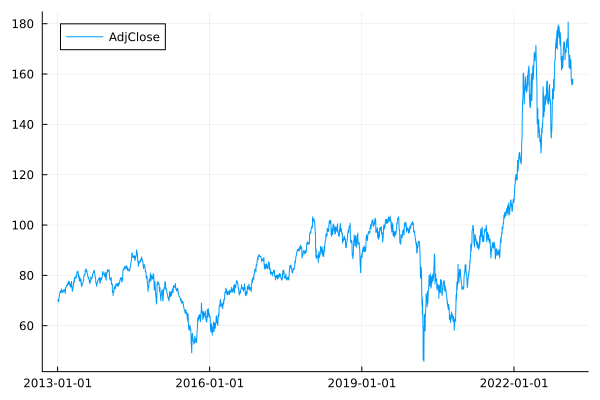

In [56]:
plot(sample)

In [68]:
include("LM_Paris_Functions.jl")

log_returns (generic function with 1 method)

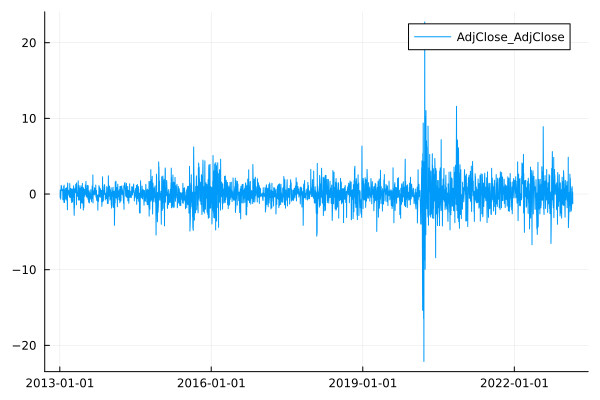

In [69]:
plot(plain_returns(sample))

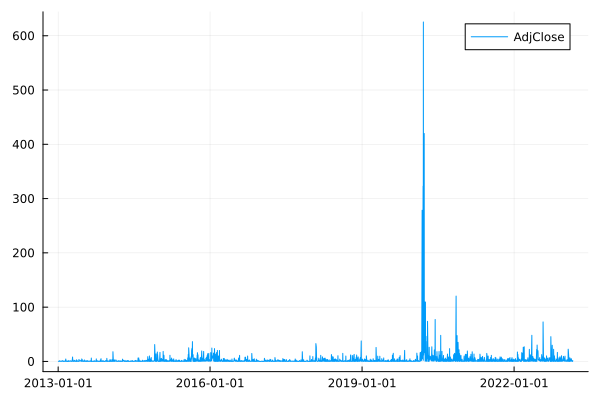

In [76]:
plot(log_returns(sample).^2)

In [95]:
exact_whittle_est(values(plain_returns(sample)).^2)

0.15586104475330168

0.8